In [1]:
import os
import sys
import torch
import matplotlib.pyplot as plt

In [6]:
datapath = "/home/ucaptp0/oasis-rt-surrogate/data/preprocessed_data/rnn_lw/dynamical"
varspath = "/home/ucaptp0/oasis-rt-surrogate/model/rnn_lw"
sys.path.append(varspath)
from vars_lw import *

inputs_path = os.path.join(datapath, "test_x.pt")
targets_path = os.path.join(datapath, "test_y.pt")
aux_path = os.path.join(datapath, "test_aux_x.pt")

# inputs = torch.load(inputs_path)
# targets = torch.load(targets_path)
aux = torch.load(aux_path)

In [21]:
nsample, nlay, nvar = inputs.shape

In [6]:
print("Inputs shape: ", inputs.shape)
print("Targets shape: ", targets.shape)

Inputs shape:  torch.Size([1536300, 49, 3])
Targets shape:  torch.Size([1536300, 50, 2])


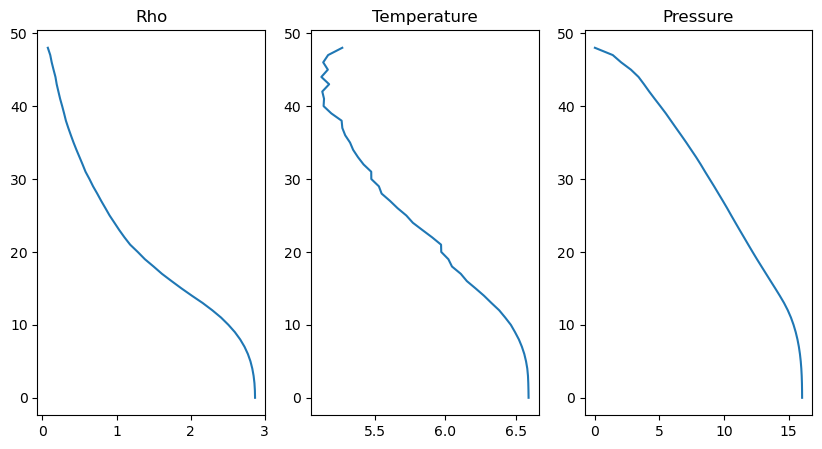

sTemperature:  tensor(729.3146)
alb_surf_lw:  tensor(0.)


In [7]:
# Choose a column
col = 0

# For chosen column (axis=0), plot input features on separate subplots along axis=1
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
for ix in range(len(INPUT_VARS)):
    axs[ix].plot(inputs[col, :, ix], range(49))
    axs[ix].set_title(INPUT_VARS[ix])
plt.show()

for ix in range(len(AUX_VARS)):
    print(f"{AUX_VARS[ix]}: ", aux[col, ix])
# # Plot targets
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# axs[0].plot(targets[col, :, 0], range(50))
# axs[0].set_title("Target 1")
# axs[1].plot(targets[col, :, 1], range(50))
# axs[1].set_title("Target 2")
# plt.show()

/tmp/ipykernel_3482/3626322256.py:7: RuntimeWarning: divide by zero encountered in log
  axs[0].plot(np.log(targets[col, :, 0]), range(50))


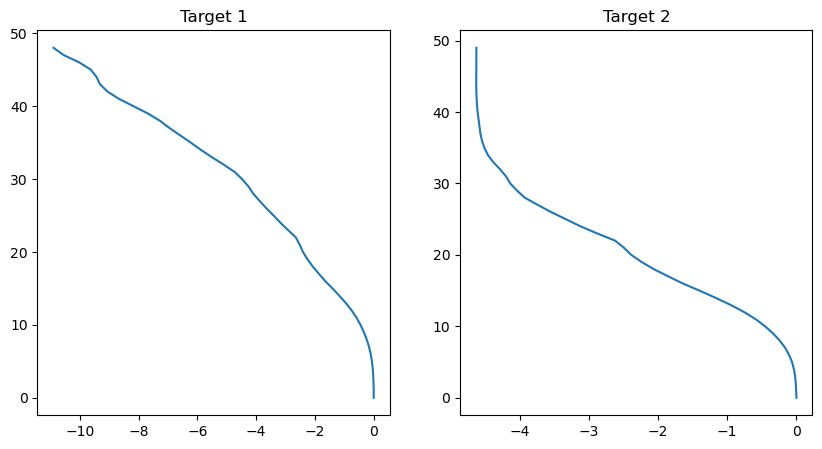

In [5]:
import numpy as np

col = 5034

# Plot targets
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(np.log(targets[col, :, 0]), range(50))
axs[0].set_title("Target 1")
axs[1].plot(np.log(targets[col, :, 1]), range(50))
axs[1].set_title("Target 2")
plt.show()

In [12]:
aux[:, 0].min()

tensor(0.)

In [10]:
# Scale temperature by sTemperature
import numpy as np
sTemperature = aux[col, 0]
np.log(sTemperature)

tensor(6.5921)

In [11]:
scaled_pressure = inputs[col, :, 2]
scaled_rho = inputs[col, :, 0]
scaled_temperature = inputs[col, :, 1]

unscaled_pressure = np.exp(scaled_pressure)
unscaled_rho = scaled_rho ** 4
unscaled_temperature = np.exp(scaled_temperature)

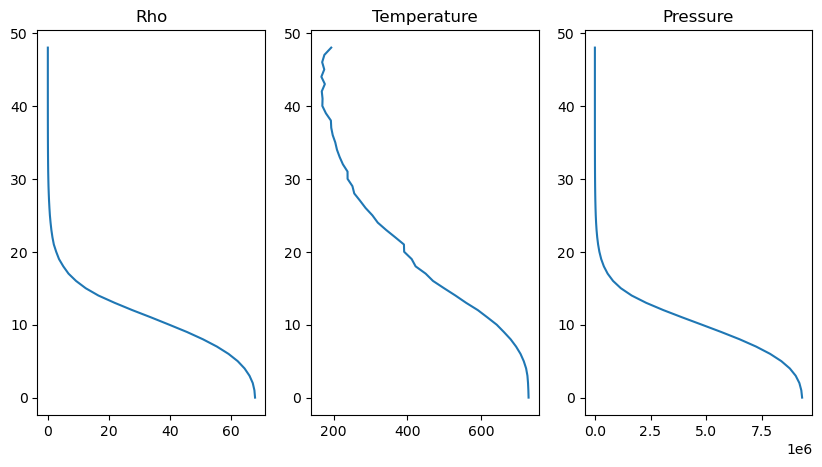

Text(0.5, 1.0, 'Pressure')

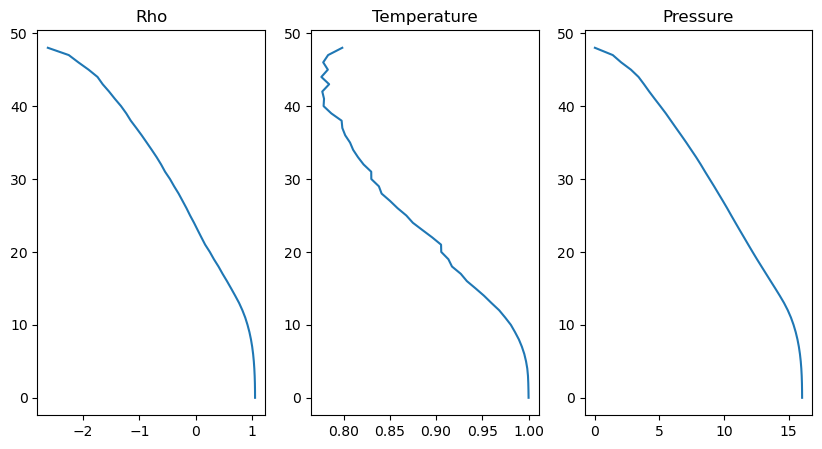

In [17]:
# Plot unscaled variables
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].plot(unscaled_rho, range(49))
axs[0].set_title("Rho")
axs[1].plot(unscaled_temperature, range(49))
axs[1].set_title("Temperature")
axs[2].plot(unscaled_pressure, range(49))
axs[2].set_title("Pressure")
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].plot(np.log(unscaled_rho) / 4, range(49))
axs[0].set_title("Rho")
axs[1].plot(np.log(unscaled_temperature) / np.log(sTemperature), range(49))
axs[1].set_title("Temperature")
axs[2].plot(np.log(unscaled_pressure), range(49))
axs[2].set_title("Pressure")

In [19]:
scaled_rho = inputs[:, :, 0]
scaled_temperature = inputs[:, :, 1]
scaled_pressure = inputs[:, :, 2]

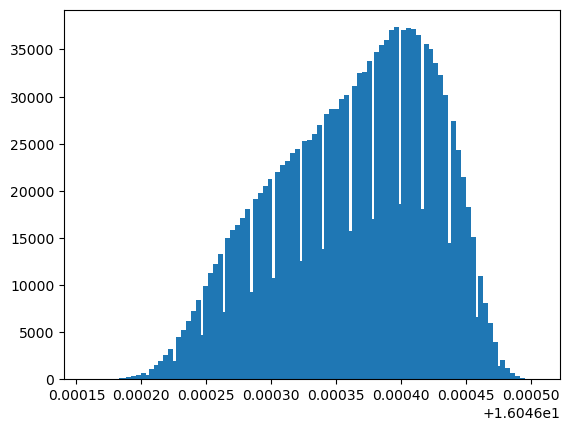

In [23]:
# Plot a histogram of the scaled pressure across all samples
fig, ax = plt.subplots()
ax.hist(scaled_pressure[:, 0].flatten(), bins=100)
plt.show()

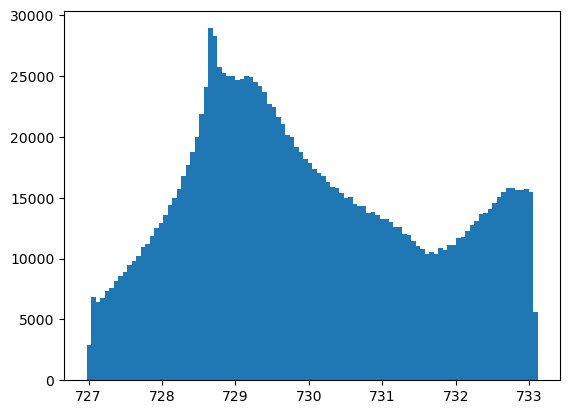

In [24]:
# Plot a histogram of sTemperature across all samples
fig, ax = plt.subplots()
ax.hist(aux[:, 0].flatten(), bins=100)
plt.show()

In [29]:
sTemperature = aux[:, 0]
print(f"Mean sTemperature: {sTemperature.mean()}")
print(f"Std sTemperature: {sTemperature.std()}")
print(f"Min sTemperature: {sTemperature.min()}")
print(f"Max sTemperature: {sTemperature.max()}")

Mean sTemperature: 729.9969482421875
Std sTemperature: 1.5986162424087524
Min sTemperature: 726.9722900390625
Max sTemperature: 733.1151733398438


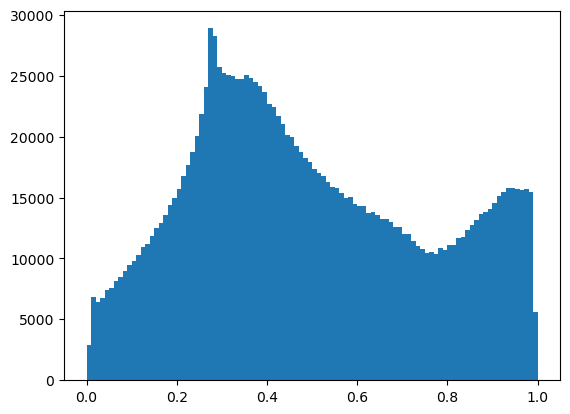

In [35]:
fig, ax = plt.subplots()
ax.hist((sTemperature - sTemperature.min()) / (sTemperature.max() - sTemperature.min()), bins=100)
plt.show()

In [52]:
unscaled_pressure = np.exp(scaled_pressure)
unscaled_rho = scaled_rho ** 4

In [39]:
sPressure = unscaled_pressure[:, 0]

In [40]:
print(f"Mean sPressure: {sPressure.mean()}")
print(f"Std sPressure: {sPressure.std()}")
print(f"Min sPressure: {sPressure.min()}")
print(f"Max sPressure: {sPressure.max()}")

Mean sPressure: 9307791.0
Std sPressure: 558.978759765625
Min sPressure: 9305888.0
Max sPressure: 9309119.0


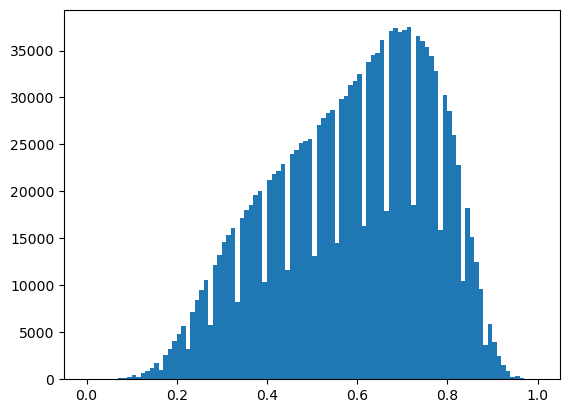

In [41]:
fig, ax = plt.subplots()
ax.hist((sPressure - sPressure.min()) / (sPressure.max() - sPressure.min()), bins=100)
plt.show()


In [44]:
new_scaled_pressure = np.log(unscaled_pressure) / np.log(sPressure[:, None])

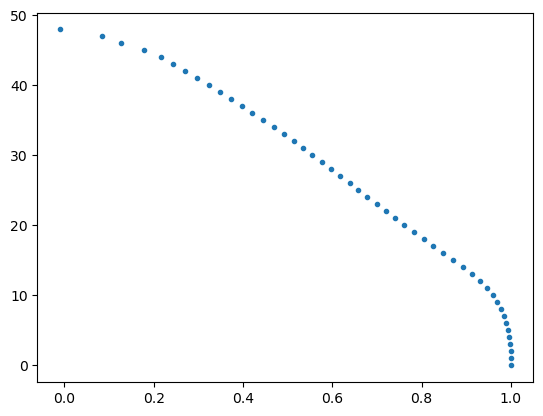

In [49]:
plt.figure()
plt.scatter(new_scaled_pressure[5675, :], range(nlay), marker='.')
plt.show()

Mean sRho: 67.82109069824219
Std sRho: 0.13681262731552124
Min sRho: 67.54853057861328
Max sRho: 68.11200714111328


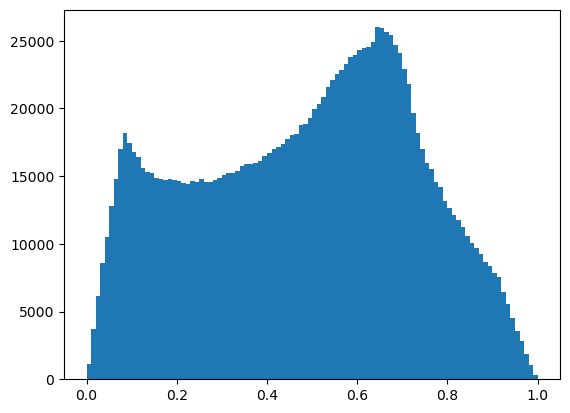

In [55]:
sRho = unscaled_rho[:, 0]

print(f"Mean sRho: {sRho.mean()}")
print(f"Std sRho: {sRho.std()}")
print(f"Min sRho: {sRho.min()}")
print(f"Max sRho: {sRho.max()}")

fig, ax = plt.subplots()
ax.hist((sRho - sRho.min()) / (sRho.max() - sRho.min()), bins=100)
plt.show()

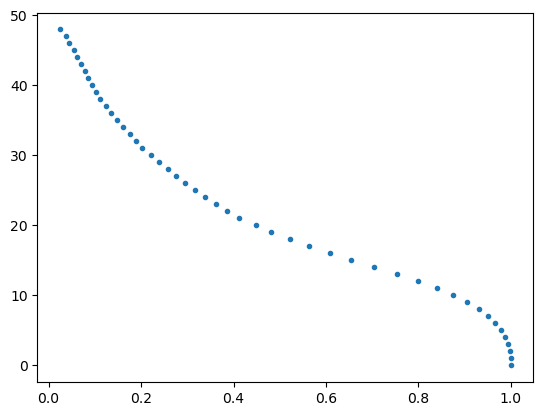

In [57]:
new_scaled_rho = np.power(unscaled_rho, 0.25) / np.power(sRho[:, None], 0.25)

plt.figure()
plt.scatter(new_scaled_rho[5675, :], range(nlay), marker='.')
plt.show()

In [50]:
new_scaled_pressure[5675, :]

tensor([ 1.0000,  0.9998,  0.9992,  0.9980,  0.9962,  0.9934,  0.9896,  0.9844,
         0.9776,  0.9692,  0.9588,  0.9462,  0.9310,  0.9129,  0.8923,  0.8705,
         0.8483,  0.8263,  0.8043,  0.7824,  0.7612,  0.7403,  0.7197,  0.6990,
         0.6787,  0.6585,  0.6387,  0.6182,  0.5974,  0.5768,  0.5553,  0.5338,
         0.5134,  0.4916,  0.4683,  0.4451,  0.4211,  0.3967,  0.3724,  0.3485,
         0.3229,  0.2962,  0.2690,  0.2427,  0.2156,  0.1787,  0.1263,  0.0834,
        -0.0099])

In [15]:
print("Aux shape: ", aux.shape)
print(aux[0, :])

# Need to scale auxiliary variables
# Need to further scale P, T, rho

Aux shape:  torch.Size([1536300, 2])
tensor([729.3146,   0.0000])
